In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

**Utilizamos el dataset iris de sklearn**

In [3]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris['feature_names'])
iris_target = pd.DataFrame(iris.target, columns=['target'])

In [4]:
#Función auxiliar para codificar los valores objetivos como etiquetas objetivo
def map_target(target_num):
    return iris.target_names[int(target_num)]

In [5]:
LOOPS = 20
MAX_ITERATIONS = 30
INITIALIZE_CLUSTERS = 'k-means++'
CONVERGENCE_TOLERANCE = 0.001
NUM_THREADS = 8

x = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]





**Un primera opción para seleccionar el número de clusters se basa en el cómputo de la inercia de cada uno de clusters. Se prueba con distintos candidatos de número de cluster y se calcula la inercia global**

Ese inercia no es sino el valor medio de la varianza de cada cluster respecto a su centroide. 

In [6]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()
    
def select_clusters(points, loops, max_iterations, init_cluster, tolerance,
                    num_threads):
    
    inertia_clusters = list()

    for i in range(1, loops + 1, 1):
        # Creamos el objeto Kmeans
        kmeans = KMeans(n_clusters=i, max_iter=max_iterations,
                        init=init_cluster, tol=tolerance, n_jobs=num_threads)

        # Calculamos Kmeans
        kmeans.fit(points)

        # Obtenemos la inercia
        inertia_clusters.append([i, kmeans.inertia_])

    plot_results(inertia_clusters)

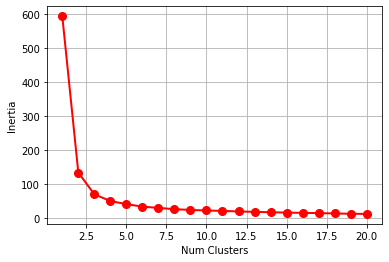

In [7]:
 select_clusters(x, LOOPS, MAX_ITERATIONS, INITIALIZE_CLUSTERS,
                    CONVERGENCE_TOLERANCE, NUM_THREADS)

**Los dendrogramas también nos pueden ser de ayuda a la hora de determinar posibles candidatos para el número de clusters**

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_dendrogram(points):
    

    # calcula la distancia entre puntos o grupos de puntos
    Z = linkage(points, metric='euclidean', method='ward')

    plt.title('Dendrogram')
    plt.xlabel('Points')
    plt.ylabel('Euclidean Distance')

    # genera el dendograma
    dendrogram(
        Z,
        truncate_mode='lastp',
        p=20,
        leaf_rotation=90.,
        leaf_font_size=12.,
        show_contracted=True
    )

    plt.show()

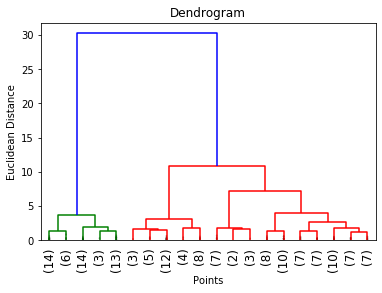

In [9]:
plot_dendrogram(x)

**Finalmente, se puede medir la distancia existente entre clusters. Se buscará el valor de cluster que maximiza la distancia inter-cluster**
Aquí nos apoyamos de nuevo en el dendrograma, pues nos permite medir en cada nivel la distancia que existen entre las diversas ramas. En cada uno de los niveles nos quedamos con las últimas 10 distancias 

In [10]:
def plot_gap(points):    

    # Calculamos las distancias entre los puntos
    Z = linkage(points, metric='euclidean', method='ward')

   
    # Nos quedamos con las últimas 10 distancias. Las distancias están en la columna 2 (tercera columna) de Z
    last = Z[-10:, 2]
    
    num_clusters = np.arange(1, len(last) + 1)

    # Determinados el Gap
    gap = np.diff(last, n=2)  # Computamos la derivada segunda
    plt.plot(num_clusters[:-2] + 1, gap[::-1], 'ro-', markersize=8, lw=2)
    plt.show()

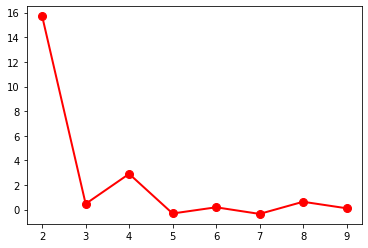

In [11]:
plot_gap(x)

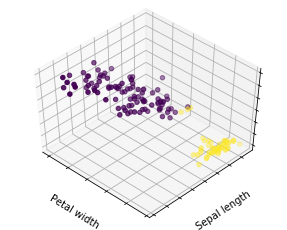

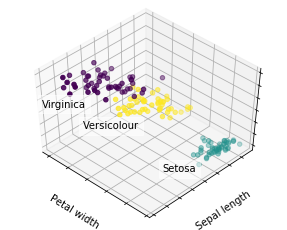

In [32]:
#kmeans_2 = KMeans(n_clusters=2,init='k-means++',max_iter=MAX_ITERATIONS)
kmeans_iris = kmeans_2.fit(x)

#kmeans_3 = KMeans(n_clusters=3,init='k-means++',max_iter=MAX_ITERATIONS)
#kmeans_iris = kmeans_3.fit(x)

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = kmeans_iris.labels_

ax.scatter(iris_data.iloc[:, 3], iris_data.iloc[:, 0], iris_data.iloc[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()


fig = plt.figure(2, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    #print((iris_target.target == label))
    ax.text3D(iris_data.iloc[np.array(iris_target.target == label), 3].mean(),
              iris_data.iloc[np.array(iris_target.target == label), 0].mean() + 1.5,
              iris_data.iloc[np.array(iris_target.target == label), 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    
    
y = np.choose(iris_target.target, [1, 2, 0]).astype(np.float)
ax.scatter(iris_data.iloc[:, 3], iris_data.iloc[:, 0], iris_data.iloc[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

 
